<a href="https://colab.research.google.com/github/kitturmanjunath101/Datascience-projects/blob/main/movie_recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

#importing the dataset
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
print(movies_df.head(20))
print(ratings_df.head())


    movieId                                  title  \
0         1                       Toy Story (1995)   
1         2                         Jumanji (1995)   
2         3                Grumpier Old Men (1995)   
3         4               Waiting to Exhale (1995)   
4         5     Father of the Bride Part II (1995)   
5         6                            Heat (1995)   
6         7                         Sabrina (1995)   
7         8                    Tom and Huck (1995)   
8         9                    Sudden Death (1995)   
9        10                       GoldenEye (1995)   
10       11         American President, The (1995)   
11       12     Dracula: Dead and Loving It (1995)   
12       13                           Balto (1995)   
13       14                           Nixon (1995)   
14       15                Cutthroat Island (1995)   
15       16                          Casino (1995)   
16       17           Sense and Sensibility (1995)   
17       18                 

In [27]:
#dropping the null values
movies_df.dropna(inplace=True)
movies_df.fillna("Unknown", inplace=True)

#filling null values with Nan
movies_df['genres'] = movies_df['genres'].fillna("")

#checking again for null values
print(movies_df['genres'].head())


#checking of null values
print(movies_df.isnull().sum())
print(ratings_df.isnull().sum())

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object
movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [9]:
#extracting important features
movies_df = movies_df[['movieId', 'title', 'genres']]
print(movies_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [10]:
#genres are stored as a string like "Action|Adventure|Fantasy". Let's convert them into a list:

# Convert genres into a list format
movies_df['genres'] = movies_df['genres'].apply(lambda x: x.split('|'))
print(movies_df.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                     [Adventure, Children, Fantasy]  
2                                  [Comedy, Romance]  
3                           [Comedy, Drama, Romance]  
4                                           [Comedy]  


In [11]:
#To build the recommendation system, we need to combine movies and ratings based on movieId:

# Merge datasets on movieId
merged_df = ratings_df.merge(movies_df, on="movieId")
print(merged_df.head())


   userId  movieId  rating   timestamp  \
0       1      296     5.0  1147880044   
1       1      306     3.5  1147868817   
2       1      307     5.0  1147868828   
3       1      665     5.0  1147878820   
4       1      899     3.5  1147868510   

                                              title  \
0                               Pulp Fiction (1994)   
1  Three Colors: Red (Trois couleurs: Rouge) (1994)   
2  Three Colors: Blue (Trois couleurs: Bleu) (1993)   
3                                Underground (1995)   
4                        Singin' in the Rain (1952)   

                             genres  
0  [Comedy, Crime, Drama, Thriller]  
1                           [Drama]  
2                           [Drama]  
3              [Comedy, Drama, War]  
4        [Comedy, Musical, Romance]  


build a content based recommendation system

In [23]:
#Since genres are in a list format, we need to convert them into a string for vectorization.
# Convert genres list to a string
import pandas as pd
movies_df['genres'] = movies_df['genres'].apply(lambda x: ''.join(x))
print(movies_df.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  
0  A   d   v   e   n   t   u   r   e   |   A   n ...  
1  A   d   v   e   n   t   u   r   e   |   C   h ...  
2  C   o   m   e   d   y   |   R   o   m   a   n ...  
3  C   o   m   e   d   y   |   D   r   a   m   a ...  
4                              C   o   m   e   d   y  


In [28]:
#Ensure Genres Are Strings

#If genres are lists, convert them to space-separated strings
movies_df['genres'] = movies_df['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [29]:
#Convert Text into Numerical Features (TF-IDF Vectorization)

#To compare movie genres, we'll use TF-IDF (Term Frequency-Inverse Document Frequency).from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

# Transform the genres column
tfidf_matrix = tfidf.fit_transform(movies_df['genres'])

print(tfidf_matrix.shape)

(62423, 23)


In [10]:
#Compute Similarity Between Movies

#Now, we calculate cosine similarity between movies. Higher similarity means more relevance!
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill NaN values (if any)
#movies_df['genres'] = movies_df['genres'].fillna(" ")

# Convert genres to a string format
movies_df['genres'] = movies_df['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Create and apply TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['genres'])

print(tfidf_matrix.shape)  # Should print (number of movies, unique genres)




(62423, 23)


In [25]:
movies_df['title'] = movies_df['title'].str.strip()


In [26]:
import re

def clean_title(title):
    return re.sub(r"\(\d{4}\)", "", title).strip()  # Removes (YYYY) from the title

movies_df['title_cleaned'] = movies_df['title'].apply(clean_title)
movie_indices = pd.Series(movies_df.index, index=movies_df['title_cleaned']).drop_duplicates()


In [30]:
def recommend_movies(title, num_recommendations=5):
    if title not in movie_indices:
        return "Movie not found! Try another movie title."

    # Get movie index
    idx = movie_indices[title]
    print(f"Movie Index: {idx}")  # Debugging

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by highest similarity
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of top similar movies
    sim_scores = sim_scores[1:num_recommendations+1]
    movie_indices_list = [i[0] for i in sim_scores]

    print(f"Recommended Movie Indices: {movie_indices_list}")  # Debugging

    # Return movie titles
    return movies_df['title'].iloc[movie_indices_list]

# Test again
print(recommend_movies("Toy Story (1995)"))


Movie not found! Try another movie title.


<ipython-input-36-547aaa006126>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette="viridis")


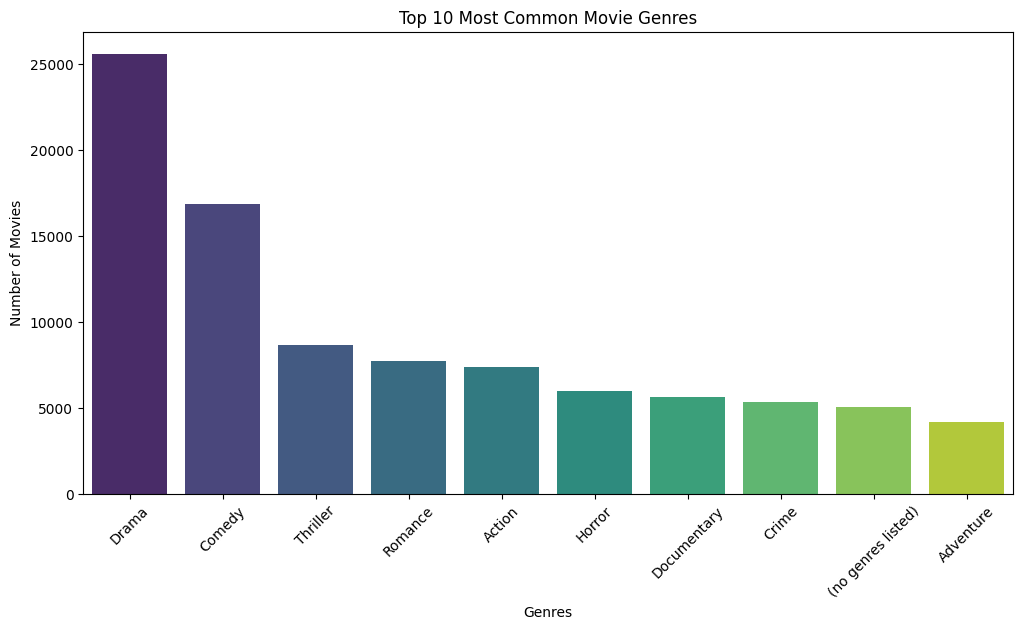

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the most common genres
genre_counts = movies_df['genres'].str.split('|').explode().value_counts()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.title("Top 10 Most Common Movie Genres")
plt.show()
